# Exploratory Data Analysis

The main objectives of this notebook are: 
- Explore the clean dataset through univariate & multivariate analysis 
- Investigate distribution of data 
- Extract relevant insights to determine steps for feature engineering

In [1]:
import polars as pl
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
import os 
from collections import Counter

# Manually add path to read from another folder 
path2add = os.path.normpath(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), os.path.pardir, "utils"))
)
if not (path2add in sys.path):
    sys.path.append(path2add)

from eda import *

In [2]:
df = pl.read_csv("../data/cleaned_google_analytics.csv",ignore_errors=True)

In [3]:
df.head()

date,visitStartTime,fullVisitorId,subContinent,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductName,v2ProductCategory
str,i64,i64,str,str,str,str,str,str,str,str,str,str
"""2017-07-31""",1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Google Lunch Bag""","""Home/Bags/More Bags/"""
"""2017-07-31""",1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Electronics Accessory Pouch""","""Home/Bags/More Bags/"""
"""2017-07-31""",1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Sport Bag""","""Home/Bags/More Bags/"""
"""2017-07-31""",1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Google Slim Utility Travel Bag""","""Home/Bags/More Bags/"""
"""2017-07-31""",1501520683,2219384770970157334,"""Eastern Europe""","""Slovakia""","""not available in demo dataset""","""Firefox""","""Windows""","""desktop""","""google""",null,"""Suitcase Organizer Cubes""","""Home/Bags/More Bags/"""


In [4]:
# Unique visitors 
print("Unique visitors:")
print(df.select(pl.col('fullVisitorId').n_unique()))

Unique visitors:
shape: (1, 1)
┌───────────────┐
│ fullVisitorId │
│ ---           │
│ u32           │
╞═══════════════╡
│ 1534          │
└───────────────┘


In [5]:
# Total visits
# print("Total visits:")
# print(df.select(pl.col('visitNumber').sum()))

In [6]:
popular_country=print_popular_stats(df, "country")
popular_country

10 most popular country:


country,count
str,u32
"""United States""",31582
"""India""",2152
"""United Kingdom""",1927
"""Canada""",1114
"""Japan""",787
"""Taiwan""",784
"""France""",598
"""Germany""",581
"""Vietnam""",500


In [7]:
print_popular_stats(df, "city")

10 most popular city:


city,count
str,u32
"""not available in demo dataset""",24486
"""Mountain View""",4608
"""New York""",3178
"""Sunnyvale""",1585
"""San Francisco""",1488
"""(not set)""",1166
"""San Jose""",1112
"""Los Angeles""",1013
"""Cambridge""",619


In [8]:
print_popular_stats(df, "browser")

10 most popular browser:


browser,count
str,u32
"""Chrome""",38185
"""Safari""",7529
"""Firefox""",1114
"""Internet Explorer""",1064
"""Edge""",428
"""Opera Mini""",282
"""Android Webview""",208
"""Mozilla Compatible Agent""",195
"""Safari (in-app)""",171


In [9]:
popular_source = print_popular_stats(df, "source")
popular_source

10 most popular source:


source,count
str,u32
"""google""",26740
"""(direct)""",18006
"""youtube.com""",3284
"""Partners""",267
"""dfa""",192
"""mail.google.com""",164
"""google.com""",159
"""m.facebook.com""",153
"""analytics.google.com""",151


In [10]:
print_popular_stats(df, "operatingSystem")

10 most popular operatingSystem:


operatingSystem,count
str,u32
"""Windows""",15432
"""Macintosh""",13948
"""iOS""",7068
"""Android""",6171
"""Linux""",3586
"""Chrome OS""",2830
"""(not set)""",453
"""Samsung""",12
"""Windows Phone""",12


In [11]:
# Total transactions 
print("Number of transactions: ",df.select(pl.col("transactionId").is_not_null().sum()))

Number of transactions:  shape: (1, 1)
┌───────────────┐
│ transactionId │
│ ---           │
│ u32           │
╞═══════════════╡
│ 462           │
└───────────────┘


In [12]:
# Total transactions 
# print("Number of transactions: ",df_count['count'][-1])

# # Percent of transactions vs all other events 
# print("Percent of transactions:",round((df_count['count'][-1] / df_count['count'].sum())*100,3))

### Univariate Analysis 

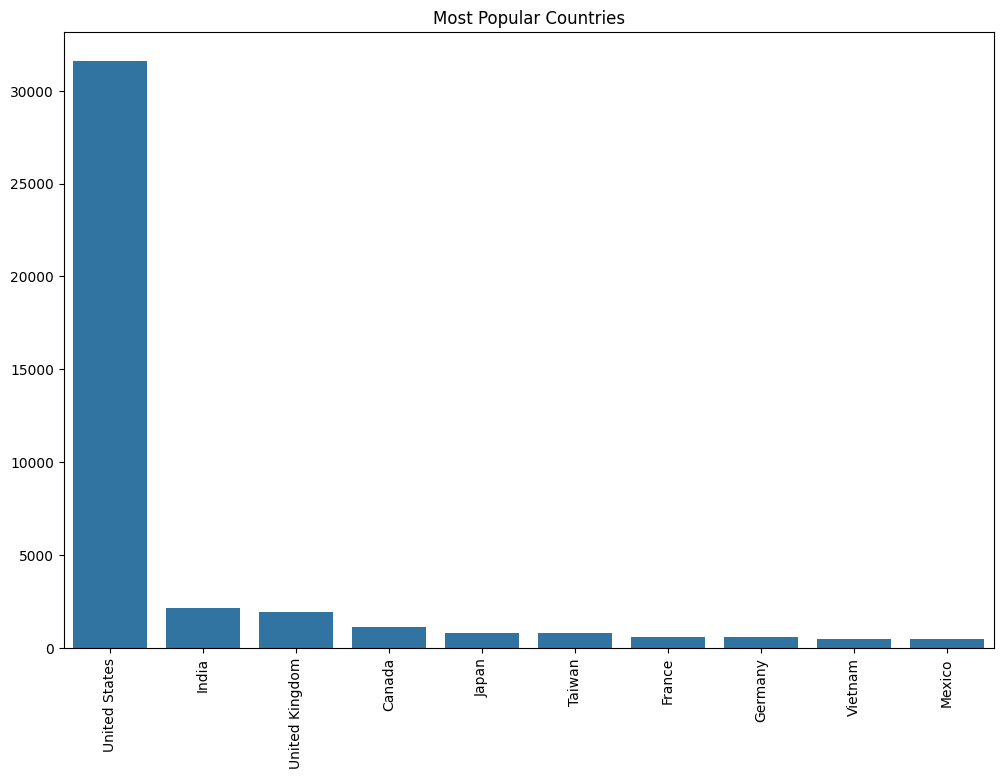

In [13]:
bar_plot(popular_country['country'].to_numpy(), popular_country['count'].to_numpy(),"Most Popular Countries")

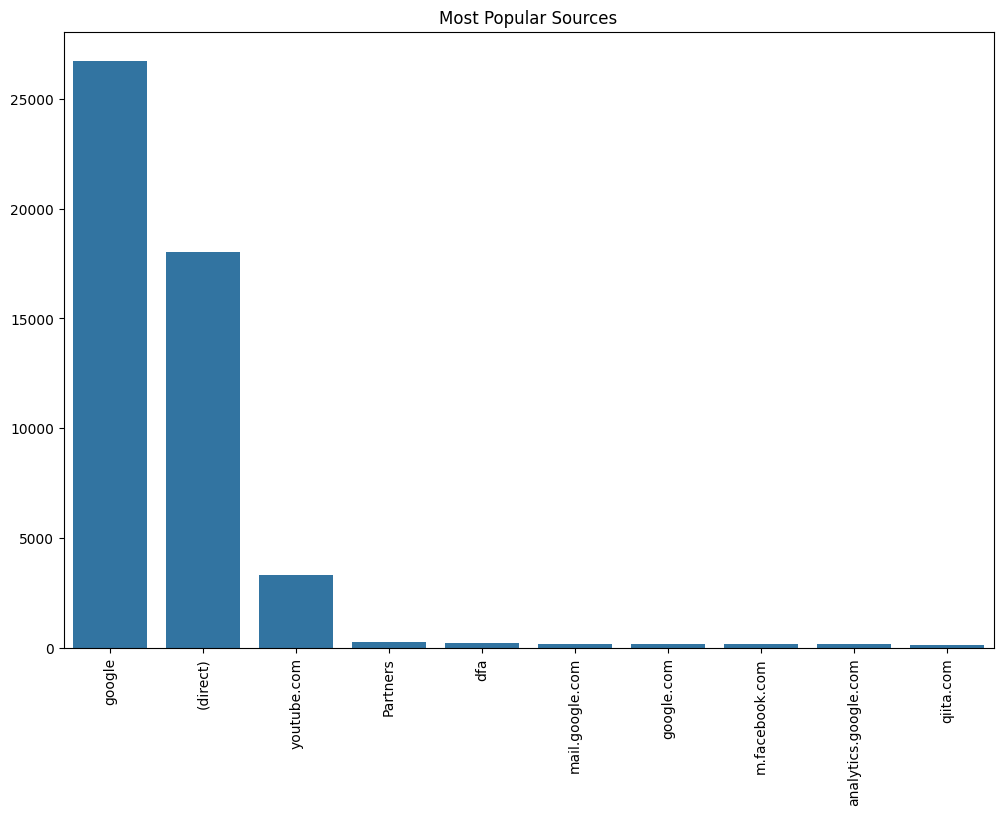

In [14]:
bar_plot(popular_source['source'].to_numpy(), popular_source['count'].to_numpy(),"Most Popular Sources")

### Multivariate Analysis 

In [15]:
grouped = df.group_by(pl.col('country')).agg(pl.col('v2ProductName'))
grouped

country,v2ProductName
str,list[str]
"""Taiwan""","[""Android Women's Fleece Hoodie"", ""Google Men's 100% Cotton Short Sleeve Hero Tee White"", … ""Google Rucksack""]"
"""Bolivia""","[""YouTube Custom Decals"", ""22 oz YouTube Bottle Infuser"", … ""You Tube Toddler Short Sleeve Tee Red""]"
"""Greece""","[""Android Wool Heather Cap Heather/Black"", ""Google Snapback Hat Black"", … ""Android Men's Long & Lean Badge Tee Charcoal""]"
"""Italy""","[""Google Laptop Backpack"", ""Google Rucksack"", … ""Google Executive Umbrella""]"
"""Belgium""","[""YouTube Custom Decals"", ""22 oz YouTube Bottle Infuser"", … ""Google Men's Long Sleeve Raglan Ocean Blue""]"
…,…
"""Brazil""","[""Android Lunch Kit"", ""Google Lunch Bag"", … ""Google Women's 3/4 Sleeve Baseball Raglan Heather/Black""]"
"""Oman""","[""Google Men's 100% Cotton Short Sleeve Hero Tee White"", ""Android Men's Engineer Short Sleeve Tee Charcoal"", … ""Google Rucksack""]"
"""Cambodia""","[""YouTube Custom Decals"", ""22 oz YouTube Bottle Infuser"", … ""You Tube Toddler Short Sleeve Tee Red""]"


In [16]:
usa_purchases = df.filter((pl.col('country') == 'United States') & (pl.col('transactionId') != 'null'))
usa_purchases

date,visitStartTime,fullVisitorId,subContinent,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductName,v2ProductCategory
str,i64,i64,str,str,str,str,str,str,str,str,str,str
"""2017-07-31""",1501525374,186231215995844689,"""Northern America""","""United States""","""Mountain View""","""Chrome""","""Macintosh""","""desktop""","""(direct)""","""ORD201707311786""","""Google Men's Bike Short Sleeve…","""Apparel"""
"""2017-07-31""",1501525374,186231215995844689,"""Northern America""","""United States""","""Mountain View""","""Chrome""","""Macintosh""","""desktop""","""(direct)""","""ORD201707311786""","""Google Men's Bike Short Sleeve…","""Apparel"""
"""2017-07-31""",1501549028,345672699449577691,"""Northern America""","""United States""","""Kirkland""","""Chrome""","""Chrome OS""","""desktop""","""(direct)""","""ORD201707312107""","""Google Blackout Cap""","""Headgear"""
"""2017-07-31""",1501549028,345672699449577691,"""Northern America""","""United States""","""Kirkland""","""Chrome""","""Chrome OS""","""desktop""","""(direct)""","""ORD201707312107""","""Google Women's Vintage Hero Te…","""Apparel"""
"""2017-07-31""",1501549028,345672699449577691,"""Northern America""","""United States""","""Kirkland""","""Chrome""","""Chrome OS""","""desktop""","""(direct)""","""ORD201707312107""","""Google Men's Long & Lean Tee C…","""Apparel"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""2017-07-31""",1501537217,7483600664917507409,"""Northern America""","""United States""","""Mountain View""","""Chrome""","""Macintosh""","""desktop""","""(direct)""","""ORD201707312663""","""Google 25 oz Red Stainless Ste…","""Drinkware"""
"""2017-07-31""",1501537217,7483600664917507409,"""Northern America""","""United States""","""Mountain View""","""Chrome""","""Macintosh""","""desktop""","""(direct)""","""ORD201707312663""","""Android 17oz Stainless Steel S…","""Drinkware"""
"""2017-07-31""",1501537217,7483600664917507409,"""Northern America""","""United States""","""Mountain View""","""Chrome""","""Macintosh""","""desktop""","""(direct)""","""ORD201707312663""","""Android Men's Short Sleeve Her…","""Apparel"""


In [17]:
usa_most_purchased = usa_purchases.group_by(pl.col('country')).agg(pl.col('v2ProductName'))
usa_most_purchased = usa_most_purchased.row(0)[1]
usa_most_purchased

["Google Men's Bike Short Sleeve Tee Charcoal",
 "Google Men's Bike Short Sleeve Tee Charcoal",
 'Google Blackout Cap',
 "Google Women's Vintage Hero Tee Black",
 "Google Men's Long & Lean Tee Charcoal",
 "Google Men's Vintage Badge Tee Black",
 'Google Blackout Cap',
 "Google Women's Vintage Hero Tee Black",
 "Google Men's Long & Lean Tee Charcoal",
 "Google Men's Vintage Badge Tee Black",
 'Android Rise 14 oz Mug',
 'Android Rise 14 oz Mug',
 'Foam Can and Bottle Cooler',
 'Foam Can and Bottle Cooler',
 "Google Men's Short Sleeve Badge Tee Charcoal",
 "Google Men's Bike Short Sleeve Tee Charcoal",
 "Google Men's Short Sleeve Badge Tee Charcoal",
 "Google Men's Bike Short Sleeve Tee Charcoal",
 "Android Men's Vintage Tank",
 "Google Men's Short Sleeve Performance Badge Tee Charcoal",
 "Google Women's Short Sleeve Badge Tee Navy",
 "Google Men's Vintage Badge Tee Black",
 "Google Women's Vintage Hero Tee White",
 "Google Women's Scoop Neck Tee Black",
 "Google Women's Short Sleeve Hero

In [18]:
# Counting the most bought items 
usa_most_bought = Counter(usa_most_purchased).most_common()
usa_most_bought=usa_most_bought[:10]
usa_most_bought

[("Google Men's 100% Cotton Short Sleeve Hero Tee Black", 24),
 ('Google Sunglasses', 16),
 ("Google Women's Short Sleeve Hero Tee Grey", 14),
 ("Google Men's Bike Short Sleeve Tee Charcoal", 12),
 ("Google Women's Vintage Hero Tee Black", 12),
 ("Google Men's Vintage Badge Tee Black", 12),
 ("Google Women's Short Sleeve Hero Tee Black", 12),
 ("Google Men's 100% Cotton Short Sleeve Hero Tee Red", 12),
 ("Google Men's Long & Lean Tee Charcoal", 10),
 ("Google Men's Short Sleeve Performance Badge Tee Charcoal", 10)]

In [19]:
# Adding names of 10 most bought item to list for plotting 
usa_bought_items = list_comprehension(usa_most_bought, "items")
usa_bought_items

["Google Men's 100% Cotton Short Sleeve Hero Tee Black",
 'Google Sunglasses',
 "Google Women's Short Sleeve Hero Tee Grey",
 "Google Men's Bike Short Sleeve Tee Charcoal",
 "Google Women's Vintage Hero Tee Black",
 "Google Men's Vintage Badge Tee Black",
 "Google Women's Short Sleeve Hero Tee Black",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Red",
 "Google Men's Long & Lean Tee Charcoal",
 "Google Men's Short Sleeve Performance Badge Tee Charcoal"]

In [20]:
# Adding frequency of 10 most bought items to list for plotting 
usa_bought_frequency = list_comprehension(usa_most_bought, "frequency")
usa_bought_frequency

[24, 16, 14, 12, 12, 12, 12, 12, 10, 10]

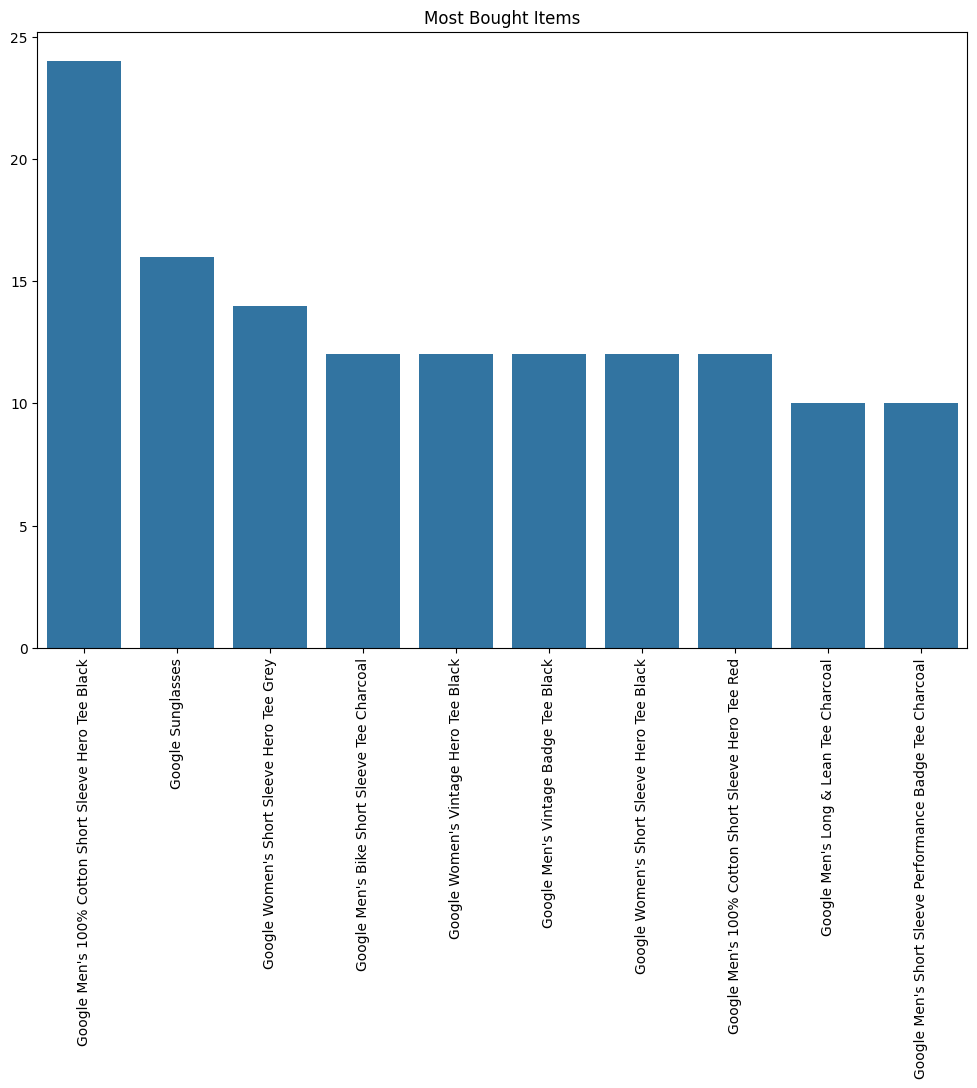

In [21]:
bar_plot(usa_bought_items,usa_bought_frequency,"Most Bought Items")

In [22]:
usa_views = grouped.filter(pl.col('country') == 'United States').row(0)[1]
usa_views

['Google Snapback Hat Black',
 'Android Wool Heather Cap Heather/Black',
 'Google Blackout Cap',
 'Google 5-Panel Snapback Cap',
 'Android 5-Panel Low Cap',
 'Google Stretch Fit Hat M/L Navy',
 'Android Stretch Fit Hat',
 'Android Stretch Fit Hat Black',
 "Google Men's 100% Cotton Short Sleeve Hero Tee White",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Black",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Navy",
 "Google Women's Short Sleeve Hero Tee White",
 "Google Women's Short Sleeve Hero Tee Black",
 "Google Women's Short Sleeve Hero Tee Red Heather",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Red",
 "Google Women's Short Sleeve Hero Tee Grey",
 "YouTube Men's Short Sleeve Hero Tee Black",
 "Google Women's Vintage Hero Tee White",
 "YouTube Men's Short Sleeve Hero Tee Charcoal",
 "Google Women's Short Sleeve Hero Tee Heather",
 "Google Women's Short Sleeve Badge Tee Grey",
 "Google Men's Vintage Badge Tee Black",
 "Google Women's Tee Grey",
 '22 oz YouTube Bottle In

In [23]:
most_viewed_items = Counter(usa_views).most_common()
most_viewed_items = most_viewed_items[:10]
most_viewed_items

[("Google Men's 100% Cotton Short Sleeve Hero Tee White", 702),
 ("YouTube Men's Vintage Henley", 604),
 ("YouTube Men's Vintage Tank", 577),
 ('YouTube Twill Cap', 529),
 ('YouTube Custom Decals', 455),
 ('22 oz YouTube Bottle Infuser', 420),
 ("Google Men's Vintage Badge Tee Black", 399),
 ("YouTube Men's Short Sleeve Hero Tee Black", 361),
 ("Android Men's Engineer Short Sleeve Tee Charcoal", 356),
 ('YouTube Hard Cover Journal', 349)]

In [24]:
# Adding frequency of 10 most add to cart items to list for plotting 
viewed_items_list = list_comprehension(most_viewed_items, "items")
viewed_items_list

["Google Men's 100% Cotton Short Sleeve Hero Tee White",
 "YouTube Men's Vintage Henley",
 "YouTube Men's Vintage Tank",
 'YouTube Twill Cap',
 'YouTube Custom Decals',
 '22 oz YouTube Bottle Infuser',
 "Google Men's Vintage Badge Tee Black",
 "YouTube Men's Short Sleeve Hero Tee Black",
 "Android Men's Engineer Short Sleeve Tee Charcoal",
 'YouTube Hard Cover Journal']

In [25]:
# Adding frequency of 10 most add to cart items to list for plotting 
viewed_frequency_list = list_comprehension(most_viewed_items, "frequency")
viewed_frequency_list

[702, 604, 577, 529, 455, 420, 399, 361, 356, 349]

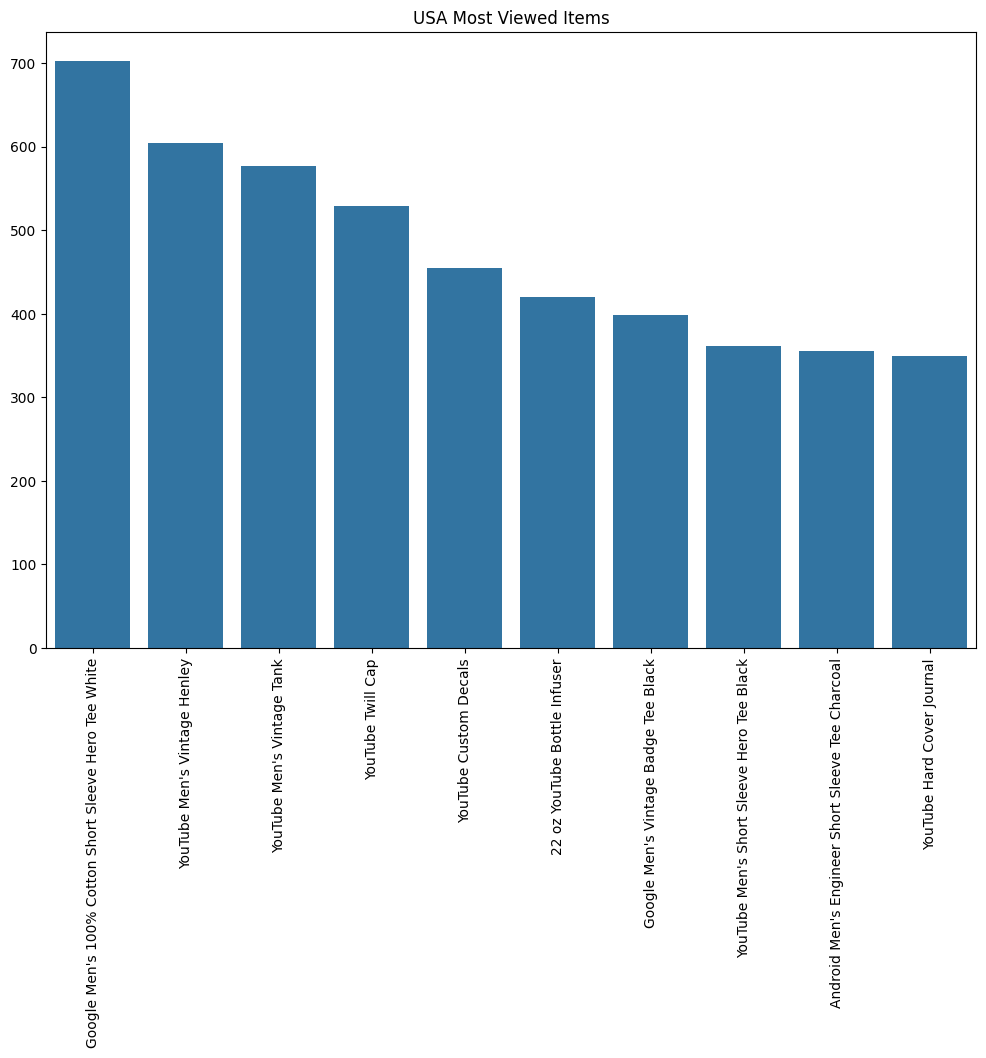

In [26]:
bar_plot(viewed_items_list,viewed_frequency_list,"USA Most Viewed Items")

In [27]:
source_purchases = usa_purchases.group_by(pl.col('source')).agg(pl.col('v2ProductName'))
source_purchases 

source,v2ProductName
str,list[str]
"""google""","[""Android Rise 14 oz Mug"", ""Android Rise 14 oz Mug"", … ""Windup Android""]"
"""(direct)""","[""Google Men's Bike Short Sleeve Tee Charcoal"", ""Google Men's Bike Short Sleeve Tee Charcoal"", … ""Google Women's Scoop Neck Tee White""]"


In [28]:
os_purchases = usa_purchases.group_by(pl.col('operatingSystem')).agg(pl.col('v2ProductName'))
os_purchases

operatingSystem,v2ProductName
str,list[str]
"""Macintosh""","[""Google Men's Bike Short Sleeve Tee Charcoal"", ""Google Men's Bike Short Sleeve Tee Charcoal"", … ""Google Women's Scoop Neck Tee White""]"
"""Linux""","[""Google Men's Short Sleeve Badge Tee Charcoal"", ""Google Men's Bike Short Sleeve Tee Charcoal"", … ""YouTube Men's Fleece Hoodie Black""]"
"""Chrome OS""","[""Google Blackout Cap"", ""Google Women's Vintage Hero Tee Black"", … ""Google Men's 100% Cotton Short Sleeve Hero Tee Red""]"
"""Windows""","[""Google Twill Cap"", ""Google Twill Cap"", … ""Windup Android""]"
"""iOS""","[""Android Rise 14 oz Mug"", ""Android Rise 14 oz Mug"", … ""Waze Mood Original Window Decal""]"
"""Android""","[""Google Sunglasses"", ""Google Sunglasses"", … ""Google 17oz Stainless Steel Sport Bottle""]"


In [29]:
browser_purchases = usa_purchases.group_by(pl.col('browser')).agg(pl.col('v2ProductName'))
browser_purchases

browser,v2ProductName
str,list[str]
"""Firefox""","[""Google Twill Cap"", ""Google Twill Cap""]"
"""Internet Explorer""","[""Google 22 oz Water Bottle"", ""Google Kick Ball"", … ""Google Kick Ball""]"
"""Safari""","[""Waze Mood Original Window Decal"", ""Waze Mood Original Window Decal"", … ""Google Women's Scoop Neck Tee Black""]"
"""Chrome""","[""Google Men's Bike Short Sleeve Tee Charcoal"", ""Google Men's Bike Short Sleeve Tee Charcoal"", … ""Google Women's Scoop Neck Tee White""]"


In [30]:
views_by_source = df.group_by(pl.col('source')).agg(pl.col('v2ProductName'))
views_by_source

source,v2ProductName
str,list[str]
"""plus.google.com""","[""Google Men's 100% Cotton Short Sleeve Hero Tee White"", ""Android Men's Engineer Short Sleeve Tee Charcoal"", … ""Android Men's Long & Lean Badge Tee Charcoal""]"
"""google""","[""Google Lunch Bag"", ""Electronics Accessory Pouch"", … ""Google 22 oz Water Bottle""]"
"""analytics.google.com""","[""Google Men's 100% Cotton Short Sleeve Hero Tee Navy"", ""YouTube Custom Decals"", … ""25L Classic Rucksack""]"
"""groups.google.com""","[""Google Women's Short Sleeve Hero Tee Sky Blue"", ""Google Tri-blend Hoodie Grey"", … ""25L Classic Rucksack""]"
"""m.facebook.com""","[""Google Women's 1/4 Zip Jacket Charcoal"", ""Google Men's Colorblock Tee White/Heather"", … ""Android Women's Short Sleeve Badge Tee Dark Heather""]"
…,…
"""Partners""","[""Google Men's Microfiber 1/4 Zip Pullover Blue/Indigo"", ""Android Rise 14 oz Mug"", … ""You Tube Toddler Short Sleeve Tee Red""]"
"""yahoo""","[""Google Men's 100% Cotton Short Sleeve Hero Tee White"", ""Android Men's Engineer Short Sleeve Tee Charcoal"", … ""Google Executive Umbrella""]"
"""l.facebook.com""","[""Nest® Cam Indoor Security Camera - USA"", ""Google Women's 1/4 Zip Jacket Charcoal"", ""Google Men's Colorblock Tee White/Heather""]"


In [31]:
df.select(pl.col('v2ProductCategory'))

v2ProductCategory
str
"""Home/Bags/More Bags/"""
"""Home/Bags/More Bags/"""
"""Home/Bags/More Bags/"""
"""Home/Bags/More Bags/"""
"""Home/Bags/More Bags/"""
…
"""Drinkware"""
"""Apparel"""
"""Apparel"""


In [32]:
df = df.with_columns(pl.when(pl.col('transactionId') != 'null').then(1).otherwise(0).alias("transactionId"))

In [33]:
user_profiles = df.group_by(pl.col('fullVisitorId')).agg(
    pl.col('country'), pl.col('browser'), pl.col('operatingSystem'), pl.col('source'),
    pl.col('transactionId'), pl.col('v2ProductCategory'), pl.col('v2ProductName')
)
user_profiles

fullVisitorId,country,browser,operatingSystem,source,transactionId,v2ProductCategory,v2ProductName
i64,list[str],list[str],list[str],list[str],list[i32],list[str],list[str]
null,"[""United States"", ""United States"", … ""United States""]","[""Chrome"", ""Chrome"", … ""Chrome""]","[""Macintosh"", ""Macintosh"", … ""Android""]","[""(direct)"", ""(direct)"", … ""(direct)""]","[0, 0, … 1]","[""(not set)"", ""(not set)"", … ""Drinkware""]","[""Google Snapback Hat Black"", ""Android Wool Heather Cap Heather/Black"", … ""Google 17oz Stainless Steel Sport Bottle""]"
8184682674439088940,"[""United States"", ""United States"", … ""United States""]","[""Chrome"", ""Chrome"", … ""Chrome""]","[""Macintosh"", ""Macintosh"", … ""Macintosh""]","[""(direct)"", ""(direct)"", … ""(direct)""]","[0, 0, … 0]","[""Home/Office/Notebooks & Journals/"", ""Home/Office/Notebooks & Journals/"", … ""(not set)""]","[""Android Hard Cover Journal"", ""Leatherette Journal"", … ""Gift Card - $250.00""]"
1479363742178176235,"[""Japan""]","[""Safari""]","[""Macintosh""]","[""Partners""]",[0],"[""(not set)""]","[""Google Men's Microfiber 1/4 Zip Pullover Blue/Indigo""]"
7229831741092720961,"[""Côte d’Ivoire"", ""Côte d’Ivoire"", … ""Côte d’Ivoire""]","[""Opera Mini"", ""Opera Mini"", … ""Opera Mini""]","[""(not set)"", ""(not set)"", … ""(not set)""]","[""(direct)"", ""(direct)"", … ""(direct)""]","[0, 0, … 0]","[""Home/Shop by Brand/YouTube/"", ""Home/Shop by Brand/YouTube/"", … ""Home/Shop by Brand/YouTube/""]","[""YouTube Custom Decals"", ""22 oz YouTube Bottle Infuser"", … ""You Tube Toddler Short Sleeve Tee Red""]"
2610496249557891333,"[""Portugal"", ""Portugal""]","[""Safari"", ""Safari""]","[""iOS"", ""iOS""]","[""google"", ""google""]","[0, 0]","[""(not set)"", ""(not set)""]","[""Google Men's 100% Cotton Short Sleeve Hero Tee Navy"", ""Gift Card - $250.00""]"
…,…,…,…,…,…,…,…
139941779064890676,"[""United States"", ""United States"", … ""United States""]","[""Chrome"", ""Chrome"", … ""Chrome""]","[""Windows"", ""Windows"", … ""Windows""]","[""google"", ""google"", … ""google""]","[0, 0, … 0]","[""Home/Electronics/"", ""Home/Electronics/"", … ""Home/Shop by Brand/Android/""]","[""Electronics Accessory Pouch"", ""Google Flashlight"", … ""Android Men's Vintage Tank""]"
4094001865527218149,"[""Canada"", ""Canada"", … ""Canada""]","[""Safari"", ""Safari"", … ""Safari""]","[""iOS"", ""iOS"", … ""iOS""]","[""google"", ""google"", … ""google""]","[0, 0, … 0]","[""Home/Shop by Brand/YouTube/"", ""Home/Shop by Brand/YouTube/"", … ""Home/Shop by Brand/YouTube/""]","[""YouTube Custom Decals"", ""22 oz YouTube Bottle Infuser"", … ""You Tube Toddler Short Sleeve Tee Red""]"
3026925947969654930,"[""United States"", ""United States"", … ""United States""]","[""Chrome"", ""Chrome"", … ""Chrome""]","[""Windows"", ""Windows"", … ""Windows""]","[""google"", ""google"", … ""google""]","[0, 0, … 0]","[""Home/Shop by Brand/YouTube/"", ""Home/Shop by Brand/YouTube/"", … ""Home/Shop by Brand/YouTube/""]","[""YouTube Custom Decals"", ""22 oz YouTube Bottle Infuser"", … ""You Tube Toddler Short Sleeve Tee Red""]"


In [34]:
# labels = df_count.select(pl.col('event')).to_series().to_list()
# pie_chart(df_count['count'], labels, "Events Frequency")